In [1]:
import math
import numpy as np
import pandas as pd

import cv2
import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

## Importing model

In [2]:
model =  tf.keras.models.load_model("model.h5", compile = False)

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

## Importing test image

In [4]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}

In [5]:
from PIL import Image
image = Image.open('extra_sample//image_2.jpg').convert('L')
image = image.resize((48, 48))
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

None
(48, 48)
L


In [6]:
np_data = np.asarray(image)

# <class 'numpy.ndarray'>
print(type(np_data))
 
#  shape
print(np_data.shape)

<class 'numpy.ndarray'>
(48, 48)


In [7]:
import cv2
temp = cv2.cvtColor(np_data, cv2.COLOR_GRAY2RGB)

print(temp.shape)

(48, 48, 3)


In [8]:
# pyplot.imshow(temp.astype(np.uint8));

## Test Result

In [9]:
temp = np.reshape(temp,(1,temp.shape[0], temp.shape[1],3))
temp = temp / 255
amuser = model.predict(temp).argmax()
print(emotion_label_to_text[amuser])

1/1 [==============================] - 0s 213ms/step
happy


Text(0.5, 0, 'Predicted Emotion: happy')

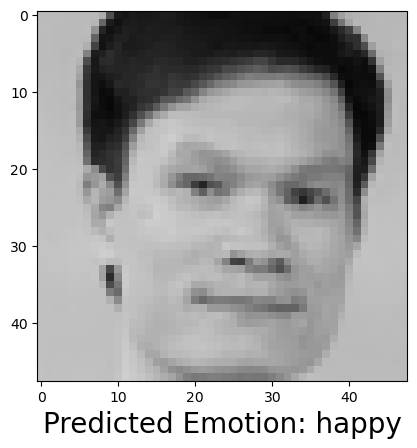

In [10]:
show_temp = np.reshape(temp*255,(48,48,3))
pyplot.imshow(show_temp.astype(np.uint8));
pyplot.xlabel("Predicted Emotion: "+emotion_label_to_text[amuser], fontsize = 20)